# Building a Handwritten Digits Classifier

In this project I will work with one of sklearn's pre-loaded datasets, the hand-written digits dataset from [University of California, Irvine](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). 

The aim of this project is to build, train, test and improve a few different deep neural networks for image classification. Specifically, the aim is to develop a model that can classify handwritten digits.

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
#Converting to dataframe, series and splitting by features and labels
data = pd.DataFrame(digits['data'])
labels = pd.Series(digits['target'])
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


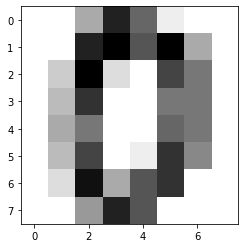

In [4]:
# Reshaping so we can visualise
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

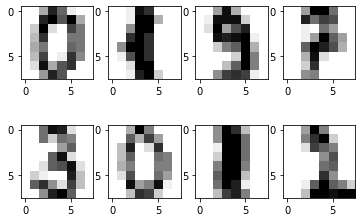

In [5]:
# Creatingg a scatter plot grid
fig, ax = plt.subplots(2,4)

# Displaying images for rows across the dataset
ax[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0,2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
ax[0,3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')
ax[1,0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1,3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

plt.show()

## K-Nearest Neighbors

As I am looking to capture nonlinearity in the data, it makes sense to use k-nearest neighbors classifer algorithm in this instance.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

#Setting up a train, test and cross-validate pipeline
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label']) / len(train_test_df)
    return accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=1, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies

knn_one_accuracies = cross_validate(1)
knn_one_av_accuracy = np.mean(knn_one_accuracies)
knn_one_av_accuracy

0.9827456075228903

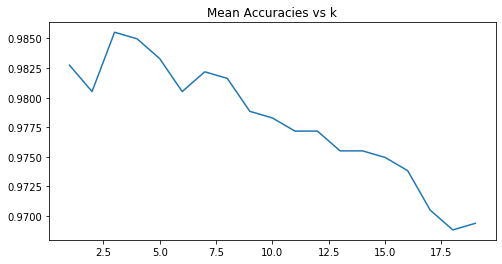

In [31]:
k_fold_accuracies = []
k_values = list(range(1,20))
for k in k_values:
    accuracies = cross_validate(k)
    mean_accuracy = np.mean(accuracies)
    k_fold_accuracies.append(mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracies vs k')
plt.plot(k_values, k_fold_accuracies)
plt.show()

The above graph illustrates that the optimum `n_neighbors` for maximumising accuracy is 3. 

However, there are some drawbacks with using k-nearest neighbors including high memory usage and an inabilty to debug and explore. 

Let's now try a neural network with a single hidden layer, using scikit-learn's [`MLPClassifer`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). 

## Neural Network with One Hidden Layer

In [32]:
from sklearn.neural_network import MLPClassifier

def train_nn(neurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neurons)
    mlp.fit(train_features, train_labels)
    return mlp

def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label']) / len(train_test_df)
    return accuracy

def cross_validate(neurons):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=1, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neurons, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies

C:\Users\George Boorman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\George Boorman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\George Boorman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\George Boorman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

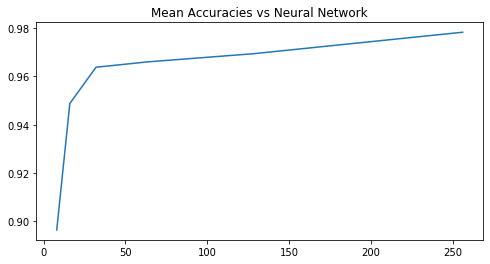

In [37]:
nn_one_accuracies = []
neuron_values = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
for n in neuron_values:
    accuracies = cross_validate(n)
    mean_accuracy = np.mean(accuracies)
    nn_one_accuracies.append(mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracies vs Neural Network')
x = [i[0] for i in neuron_values]
plt.plot(x, nn_one_accuracies)

Adding more neurons to a single hidden layer improved accuracy until we reach 32 (approximately 96.5%), after which we appear to see overfitting. 

This is actually a little less accurate than k-nearest neighbors, so a single hidden layer neural network doesn't seem to offer any advantages. Let's now see if accuracy improves with an additional hidden layer.

## Neural Network with Two Hidden Layers

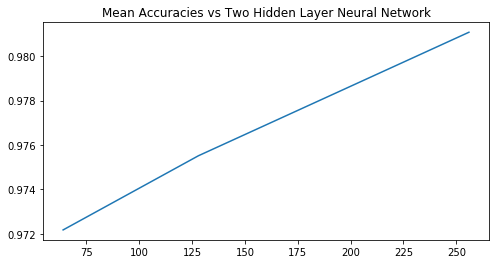

In [42]:
nn_two_accuracies = []
two_neuron_values = [
    (64,64),
    (128,128),
    (256,256)
]

for n in two_neuron_values:
    accuracies = cross_validate(n)
    mean_accuracy = np.mean(accuracies)
    nn_two_accuracies.append(mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracies vs Two Hidden Layer Neural Network')
x = [i[0] for i in two_neuron_values]
plt.plot(x, nn_two_accuracies)

Adding a second hidden layer has improved accuracy of the neural network, and the accuracy continues to increase as the number of neurons increases without showing signs of overfitting. At 256 neurons we achieve similar accuracy to the k-nearest neighbors algorithm.

Let's go for a third layer and see what impact this has. To minimise risk of overfitting, cross-validation will this time be increased from 4 to 6.

C:\Users\George Boorman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\George Boorman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\George Boorman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\George Boorman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

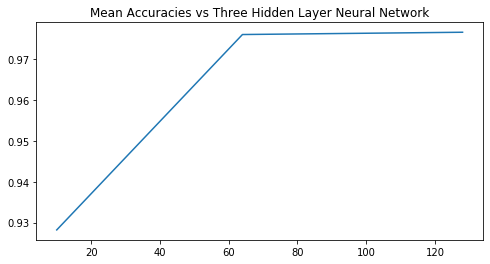

In [43]:
def cross_validate(neurons):
    fold_accuracies = []
    kf = KFold(n_splits=6, random_state=1, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neurons, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies

nn_three_accuracies = []
three_neuron_values = [
    (10,10,10),
    (64,64,64),
    (128,128,128)
]

for n in three_neuron_values:
    accuracies = cross_validate(n)
    mean_accuracy = np.mean(accuracies)
    nn_three_accuracies.append(mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracies vs Three Hidden Layer Neural Network')
x = [i[0] for i in three_neuron_values]
plt.plot(x, nn_three_accuracies)

Unfortunately adding a third hidden layer didn't have much effect on accuracy of the model at up to 64 neurons, and overfitting appears to kick in above this point. 